In [1]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

dataset_train = pd.read_csv('formatted_128444.csv')
copy = pd.read_csv('formatted_128444.csv')
dataset_train = dataset_train.dropna(axis='columns')
dataset_train = dataset_train.astype('float32')
dataset_train = dataset_train.drop(['INS','ANN','DATE'], 1)

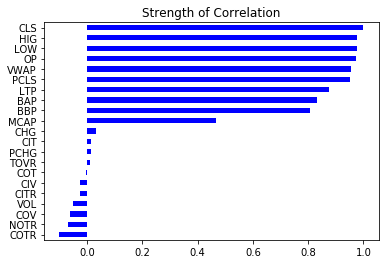

In [2]:
corr = dataset_train.corrwith(dataset_train['CLS'])
corr.sort_values().plot.barh(color = 'blue',title = 'Strength of Correlation')

(1641, 21)


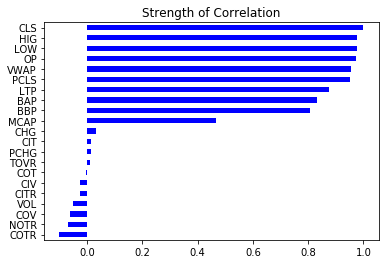

In [3]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset_train.values)
print(scaled.shape)
names = dataset_train.columns
scaled = pd.DataFrame(scaled, columns=names)
corr = scaled.corrwith(scaled['CLS'])
corr.sort_values().plot.barh(color = 'blue',title = 'Strength of Correlation')

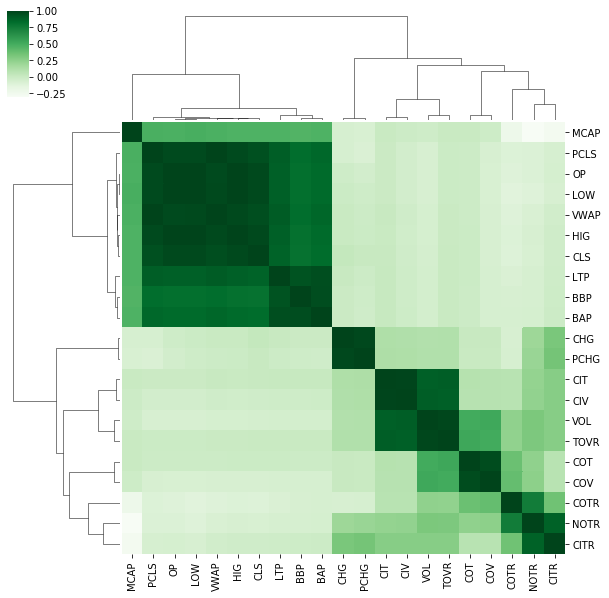

In [4]:
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial import distance

corr_matrix = dataset_train.corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,row_cluster=True,col_cluster=True,figsize=(10,10),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns

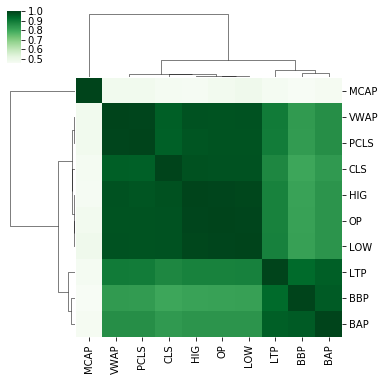

Correlation Strength:
CLS     1.000000
HIG     0.977118
LOW     0.975696
OP      0.974928
VWAP    0.954878
PCLS    0.951575
LTP     0.874003
BAP     0.832109
BBP     0.806213
MCAP    0.467907
dtype: float64


In [5]:
correlated_features = corr[corr>0.3].index.tolist()
corr_matrix = dataset_train[correlated_features].corr()
correlations_array = np.asarray(corr_matrix)

linkage = hierarchy.linkage(distance.pdist(correlations_array), \
                            method='average')

g = sns.clustermap(corr_matrix,row_linkage=linkage,col_linkage=linkage,\
                   row_cluster=True,col_cluster=True,figsize=(6,6),cmap='Greens')
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

label_order = corr_matrix.iloc[:,g.dendrogram_row.reordered_ind].columns
print("Correlation Strength:")
print(corr[corr>0.1].sort_values(ascending=False))